# 1. Linera Regression
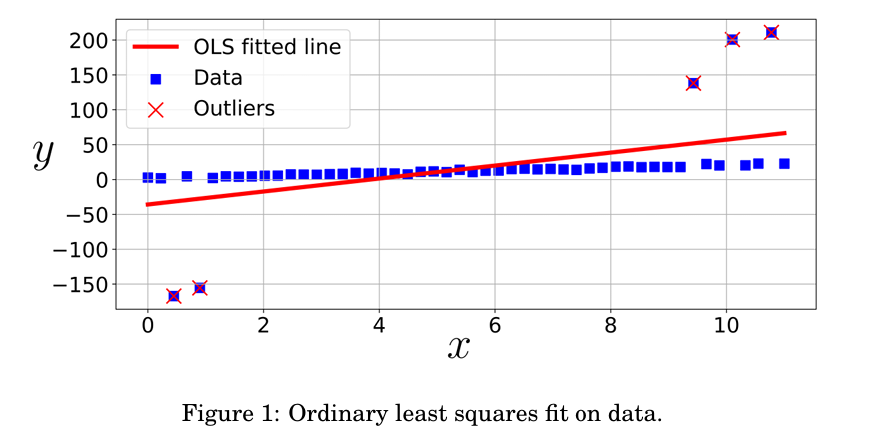

### Ordinary Lease Squares (OLS)
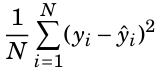

#### Q1. Why can the OLS line be “not aligned to the majority of data points”?

#### Answer
In the data we can see there are some outliers. Due to these outliers the residual becomes larger than a the residual for an inlier. Since the OLS uses the square of the residual the impact from the outliers become very larger. Due to this effects of the outliers OLS fitted line is not aligned to majority of data points.

#### Q2. Which weighting scheme gives a better line for inliers? Justify.

#### Answer

Let's consoder the modified loss function

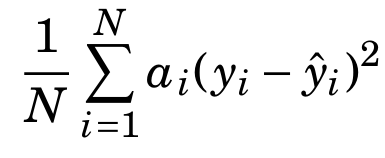

Proposed scheme
- Scheme 1: For outliers a_i = 0.01 and for inliers a_i = 1
- Scheme 2: For outliers a_i = 5 and for inliers a_i = 1

Lets check how these schemes afftect the fitted lines using an aproximate example



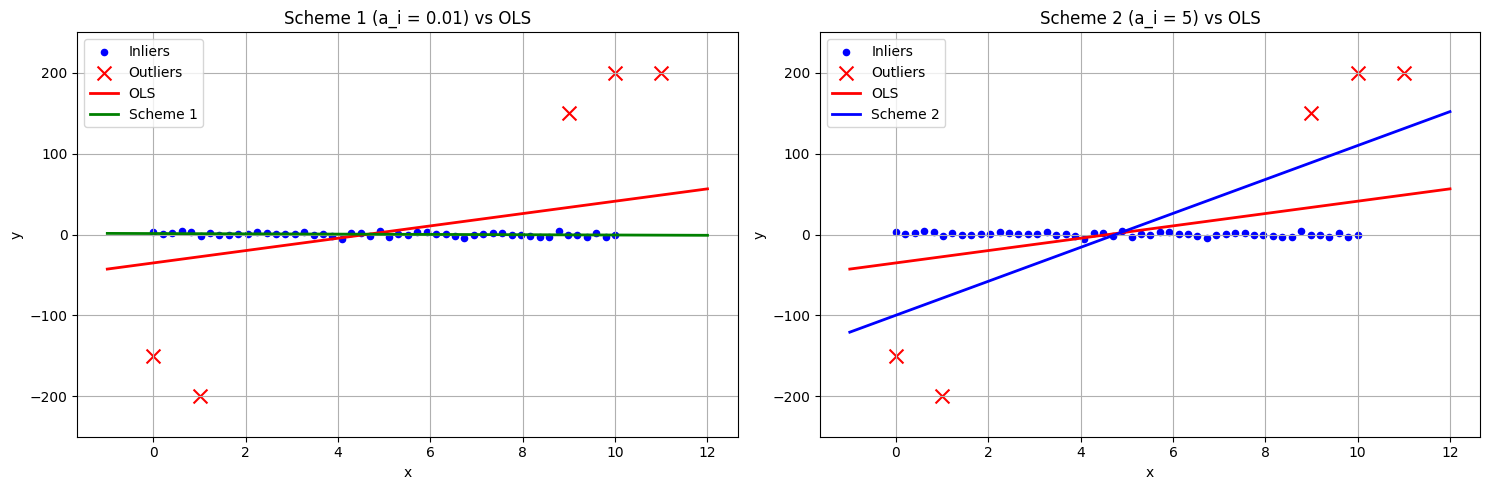

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate inlier points
x_in = np.linspace(0, 10, 50)  # Generate 50 points between 0 and 10
y_in = np.zeros_like(x_in) + np.random.normal(0, 2, size=len(x_in))  # Points around y=0

# Define outlier points
x_out = np.array([0, 1, 9, 10, 11])
y_out = np.array([-150, -200, 150, 200, 200])

# Combine inliers and outliers
X = np.concatenate([x_in, x_out])
Y = np.concatenate([y_in, y_out])

# Create design matrix
X_design = np.vstack([np.ones_like(X), X]).T

# Function to compute weighted least squares
def weighted_least_squares(X, y, weights):
    W = np.diag(weights)
    beta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    return beta

# Create weights for both schemes
weights1 = np.ones(len(X))
weights1[-5:] = 0.01  # Last 5 points are outliers, scheme 1

weights2 = np.ones(len(X))
weights2[-5:] = 5     # Last 5 points are outliers, scheme 2

# Compute coefficients for OLS and both schemes
beta_ols = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y
beta_scheme1 = weighted_least_squares(X_design, Y, weights1)
beta_scheme2 = weighted_least_squares(X_design, Y, weights2)

# Create points for plotting the lines
x_plot = np.linspace(-1, 12, 100)
y_ols = beta_ols[0] + beta_ols[1] * x_plot
y_scheme1 = beta_scheme1[0] + beta_scheme1[1] * x_plot
y_scheme2 = beta_scheme2[0] + beta_scheme2[1] * x_plot

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Scheme 1
ax1.scatter(x_in, y_in, c='blue', label='Inliers', s=20)
ax1.scatter(x_out, y_out, c='red', marker='x', s=100, label='Outliers')
ax1.plot(x_plot, y_ols, 'r-', label='OLS', linewidth=2)
ax1.plot(x_plot, y_scheme1, 'g-', label='Scheme 1', linewidth=2)
ax1.set_ylim(-250, 250)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Scheme 1 (a_i = 0.01) vs OLS')
ax1.grid(True)

# Plot for Scheme 2
ax2.scatter(x_in, y_in, c='blue', label='Inliers', s=20)
ax2.scatter(x_out, y_out, c='red', marker='x', s=100, label='Outliers')
ax2.plot(x_plot, y_ols, 'r-', label='OLS', linewidth=2)
ax2.plot(x_plot, y_scheme2, 'b-', label='Scheme 2', linewidth=2)
ax2.set_ylim(-250, 250)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.set_title('Scheme 2 (a_i = 5) vs OLS')
ax2.grid(True)

plt.tight_layout()
plt.show()

We can see that the scheme 1 gives a better fitted line than scheme 2.
This is because it reduse weights the outliers reducing their impact therefore the fitted line align with most of the data points. However scheme 2 do the exact opposite it increase the weight of the outliers. This results a greater deviation in the fitted line with actual inlier data points.

#### Q3. Why is plain linear regression unsuitable for “which brain regions predict the task”?

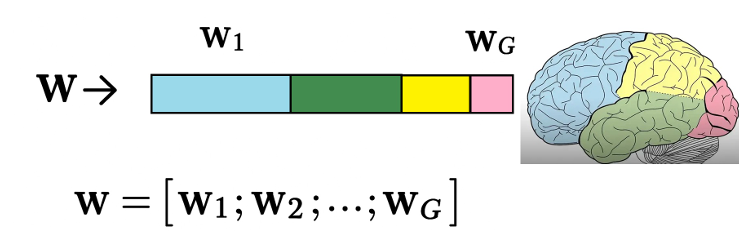

In brain image analysis (e.g., fMRI), the brain is divided into multiple regions as
 show in Figure 2, each consisting of many voxels (pixels). A researcher wants to
 identify which brain regions are most predictive of a specific cognitive task.

#### Answer
Each of the divided regions of the brain has many voxels, and we want identify which brain regions are most predictive of a specific cognitive task.

For this task these are the issues that we encounter if we used plain Linear Regerssion.
- Has too many features but too few samples 
    - In brain studies, we might have many volxes but only few of people in the experiment. Linera regression needs more data than features to work properly. In our case since we have more features than subjects the model can overfit. It will not be generalized.
- Features are highly correlated
    - Voxels inside the same brain region behave similarly. When predictors are almost copies of each other, the regerssion struggles to to predict which voxel gets how much weight. Small changes in the data can make the weights change so much. This makes the results unstable and unreliable. 
- No automatic feature selection
    - Ordinary regression tries to use all voxels at once. It don't know how to ingore the irrelevent voxels. Due to this its is hard to know which volxels are really important for the predicting the task. Due to this reason we will just ended up with bunch of coefficients, many of which may be just noise.
- Ignores natural grouping of volxels into regions
    - Linear regression looks at voxels one by one but it dosen't consider the group stucture. Therefore we might get scattered voxels selected across the brain, which migh not make sense biologically.

#### Q4, Q5. Which method (LASSO or group LASSO) is more appropriate in this setting, and why? 

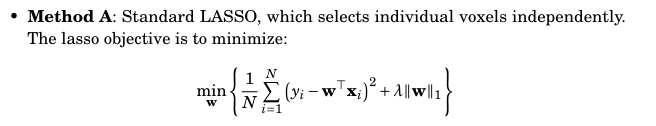

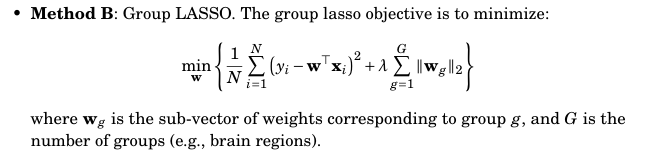


#### Answer
- Standerd LASSO (Method A),this regression method adds an extra panelty to the model and because of that some coefficients reduced up to zero.By doing this we can selects individual voxels. This is good for sparsity but it tends to pick scatterd voxels from correlated groups, which is hard to map back to the regions.
- Group LASSO (Method B), Acts same as Standerd LASSO but it rspects group stucture.What is is specal about Group LASSO is it adds a penalty that selscts or drop entire regions.

- Therefore for this application Group LASSO is more suitable because it selects entire brain regions rather than scatterd the voxels. This makes the results more stable, easier to interpret.

# 2. Logistic Regression

#### Q1, Q2. Use the code given in listing 1 to load data. Now, use the code given in listing 2 to train a logistic regression model. Here, did you encounter any errors? If yes, what were they, and how would you go about resolving them ?

In [6]:
# Listing 1: Data load and preprocessing

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [7]:
# Listing 2 : Training a LR model

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

ValueError: could not convert string to float: 'Adelie'

#### Answer
- Yes, I encounterd an Error
    - `ValueError: could not convert string to float: 'Adelie'`
- The error occurs because the logistic regerssion model can't handle catagorical data. this happens because there are some string values in the columns like "species' and some othe catagorical features that need to be converted in to numerical values.
- As Solution we can use encoding to labal those data. For this I used One-hot encoding. We can also use LebalEncoding too for this task but One-hot encdoing is better at handing these kind of tasks.
- Following code is the corrected one.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder for target variable
le = LabelEncoder()
y = le.fit_transform(df_filtered['species'])

# Separate numerical and categorical columns
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['sex', 'island']

# Create one-hot encoder for categorical variables
onehot = OneHotEncoder(sparse_output=False, drop='first')  # Changed sparse to sparse_output
categorical_encoded = onehot.fit_transform(df_filtered[categorical_cols])
categorical_features = onehot.get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded features
X_numeric = df_filtered[numeric_cols].values
X_combined = np.hstack([X_numeric, categorical_encoded])

# Create final feature matrix with labeled columns
feature_names = list(numeric_cols) + list(categorical_features)
X = pd.DataFrame(X_combined, columns=feature_names)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results with feature names
print("Accuracy:", accuracy)
print("\nFeature coefficients:")
for feature, coef in zip(feature_names, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

Accuracy: 0.5813953488372093

Feature coefficients:
bill_length_mm: 0.0028
bill_depth_mm: -0.0001
flipper_length_mm: 0.0005
body_mass_g: -0.0003
sex_Male: 0.0000
island_Dream: 0.0002
island_Torgersen: -0.0001
Intercept: -0.0000


c:\Users\User\miniconda3\envs\ptr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Q3.  Why does the saga solver perform poorly?

#### Answer
- "saga" solver oftern needs feature scaling for proper convergence. Without scalling, the optimization problem is ill-conditioned. This gives following warining.
    - ` ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(`

- Default `max_iter=100` This is usually too small. It shoul set to a higher value.
- These are the reasons why `saga` solver perform poorly.

#### Q4. Now change the `saga` to `liblinera` and check the accuracy

#### Answer

- Accuracy with liblinear solver
    - When used "liblinear" :
        - Accuracy = 1
    - When comparing to "saga" , "liblinear" shows perfect classification

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder for target variable
le = LabelEncoder()
y = le.fit_transform(df_filtered['species'])

# Separate numerical and categorical columns
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['sex', 'island']

# Create one-hot encoder for categorical variables
onehot = OneHotEncoder(sparse_output=False, drop='first')  # Changed sparse to sparse_output
categorical_encoded = onehot.fit_transform(df_filtered[categorical_cols])
categorical_features = onehot.get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded features
X_numeric = df_filtered[numeric_cols].values
X_combined = np.hstack([X_numeric, categorical_encoded])

# Create final feature matrix with labeled columns
feature_names = list(numeric_cols) + list(categorical_features)
X = pd.DataFrame(X_combined, columns=feature_names)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(solver='liblinear')  # Changed solver to liblinear
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results with feature names
print("Accuracy:", accuracy)
print("\nFeature coefficients:")
for feature, coef in zip(feature_names, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

Accuracy: 1.0

Feature coefficients:
bill_length_mm: 1.5152
bill_depth_mm: -1.3916
flipper_length_mm: -0.1441
body_mass_g: -0.0037
sex_Male: -0.2264
island_Dream: 0.7346
island_Torgersen: -0.5619
Intercept: -0.0774


#### Q5. Why does the "liblinear" solver perform better than "saga" solver ?

#### Answer
- Acording to the results 
    - saga:- Accuracy = 0.5813953488372093 with `ConvergenceWarning`
    - liblinear:- Accuracy = 1.0

- Reasons behind these obseravations
    1. Dataset size
        - "liblinear" is designed for small to medium dense datasets like penguines.
        - However "saga" is desgigned and optimized for very large datasets or with support to sparse high-dimentional problems. For small dense data, "saga" is often slower.
    2. Optimization methods
        - "liblinear" uses a coordinate descent/ dual optimization methods, which is deterministic and converges reliably for binary classification.
        - But "saga" slover uses a stochastic gradient-based slover, which means it updates parametes using random mini-batches. On small data, this introduces nosie and slow convergence.
    3. Feature scaling
        - "saga" sensitive to the unscaled features because its step size is depending on the feature magnitudes. Without scaling, optimization is ill-conditioned.
        - However liblinear is much less sensitive to feature scaling.
    4. Convergence
        - In our situation "saga" hit maximum iteration limit 100 without converging
        - However, "liblinear" converged properly. This lead to perfect seperation of the two species.

#### Q6.  Explain why the model’s accuracy (with saga solver) varies with different random state values ?


#### Answer
1. Train/test split randomness
    - "random_state" is affecting how the dataset is split into training data and test data.
    - With small dataset like penguins, changing the split can easily change which samples are in training vs test. Beacause the "saga" sovler doen't converge well, even the small differences in the split lead to large changes in accuracy.
2. Stochastic optimization
    - "saga" uses randomness in it for updating coefficients.
    - Different random seeds lead to different optimization paths, This happens especially if the solver has not converged.
    - Because the it stops early, "saga" results depends more on that random path.

#### Q7. Compare the performance of the "liblinear" and "saga" solvers with feature scaling. If there is a significant difference in the accuracy with and without feature scaling,what is the reason for that. You may use Standard Scaler available in sklearn library.

#### Answer
- With feature scaling
    - "saga" solvers accuracy improves significantly and converges becomes reliable
    - "liblinear" accuracy stays same because it is less sensitive to the feature scaling
- Reasons
    - "saga" is gradient-base stochastic solver, beacse of that it is very sensitive to feature magnitudes.
    - By scalling all features become omparable, hence improving optimization.
    - "liblinear" uses coordinate decent, it is less affected by scaling.
- Conclution
    - Scaling makes "saga" better. but there is no significant difference for "liblinear".

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Load and preprocess data
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Encode target
le = LabelEncoder()
y = le.fit_transform(df_filtered['species'])

# Prepare features
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['sex', 'island']

# One-hot encode categorical
onehot = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = onehot.fit_transform(df_filtered[categorical_cols])
categorical_features = onehot.get_feature_names_out(categorical_cols)

# Combine features
X_numeric = df_filtered[numeric_cols].values
X_combined = np.hstack([X_numeric, categorical_encoded])
feature_names = list(numeric_cols) + list(categorical_features)
X = pd.DataFrame(X_combined, columns=feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the two pipelines we want to compare
pipelines = {
    'saga_with_scaling': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(solver='saga', max_iter=1000))
    ]),
    'liblinear': Pipeline([
        ('classifier', LogisticRegression(solver='liblinear'))
    ])
}

# Train and evaluate models
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
print("Model Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Print feature importances for scaled saga model
saga_scaled = pipelines['saga_with_scaling']
coefficients = saga_scaled.named_steps['classifier'].coef_[0]
scaled_features = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nTop feature importances (SAGA with scaling):")
print(scaled_features.sort_values(by='Coefficient', key=abs, ascending=False))

Model Accuracies:
saga_with_scaling: 1.0000
liblinear: 1.0000

Top feature importances (SAGA with scaling):
             Feature  Coefficient
0     bill_length_mm     3.343324
5       island_Dream     1.115379
4           sex_Male    -0.920930
6   island_Torgersen    -0.518325
1      bill_depth_mm    -0.465388
2  flipper_length_mm     0.439962
3        body_mass_g    -0.356362


#### Q8.  Suppose you have a categorical feature with the categories ’red’, ’blue’, ’green’, ’blue’, ’green’. After encoding this feature using label encoding, you then apply a feature scaling method such as Standard Scaling or Min-Max Scaling. Is this approach correct? or not?. What do you propose ?

#### Answer
- This apporach is incorrect.
- Here are the reasons why it is incorrect.
    1. Artificial Ordering
        - Since label encoder encode catagiries to numbers like red = 0, blue = 1, green = 2, The scalling of these values makes less sense because it assusmes the distance between catagories are meaningfull.
    2. Distance Problem
        - After scaling, the distances between catagories would be treated as meaningful
        - For example, if red = 0 then blue = 1 and green = 2.
        - Scaling would preserve these relative distances suggesting blue is between red and green.

- The proposed approach
    - use One-Hot Encoding
        - `# Convert: 'red', 'blue', 'green'`
        - `# To:`
        - `# red blue green`
        - `# 1     0      0`
        - `# 0     1      0`
        - `# 0     0      1`
        - `# 0     1      0`
        - `# 0     0      1 `

# 3. Logistic regression First/Second-Order Methods

#### Q1. Use the code given in listing 3 to generate data. Here, variable y and X are class labels and corresponding feature values, respectively.

In [ ]:
# Listing 3: Data generation

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

#### Q2. Implement batch Gradient descent to update the weights for the given dataset over20 iterations. State the method used to initialize the weights and reason for your selection.

#### Answer

Iteration 0, Loss: 0.6499
Iteration 5, Loss: 0.4885
Iteration 10, Loss: 0.3877
Iteration 15, Loss: 0.3207


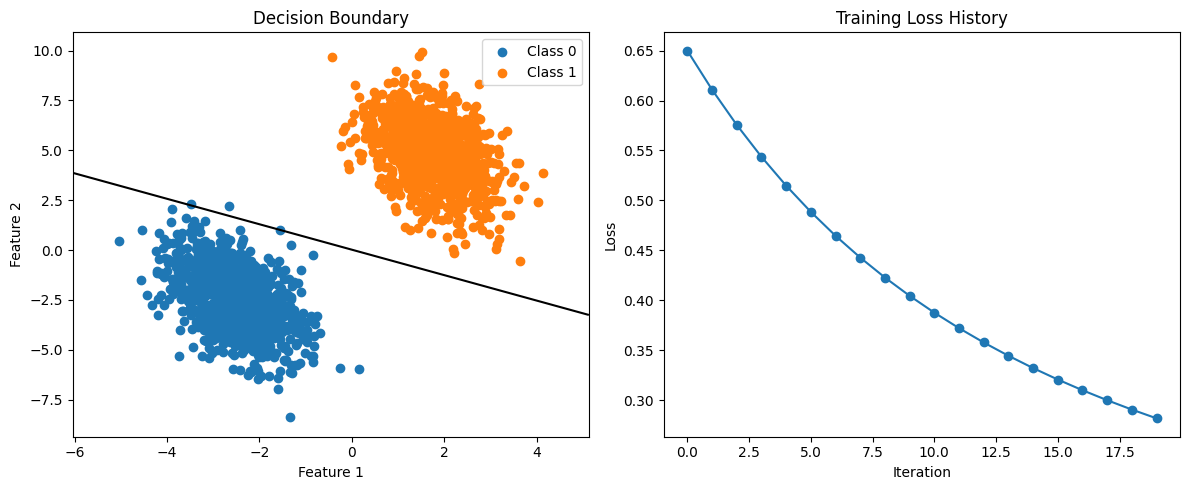


Final weights: [-0.0049357   0.15122723  0.23719972]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights to zeros
weights = np.zeros(X_b.shape[1])  # 3 weights (bias, w1, w2)

def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights):
    """Binary cross-entropy loss"""
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = -1/m * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))
    return loss

# Training parameters
learning_rate = 0.01
n_iterations = 20
losses = []

# Batch gradient descent
for i in range(n_iterations):
    # Forward pass
    z = np.dot(X_b, weights)
    predictions = sigmoid(z)
    
    # Compute gradients
    gradients = 1/len(y) * np.dot(X_b.T, (predictions - y))
    
    # Update weights
    weights = weights - learning_rate * gradients
    
    # Store loss
    loss = compute_loss(X_b, y, weights)
    losses.append(loss)
    
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot decision boundary
plt.subplot(121)
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')

# Create mesh grid for decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# Make predictions
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_b = np.c_[np.ones((grid.shape[0], 1)), grid]
Z = sigmoid(np.dot(grid_b, weights))
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, levels=[0.5], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')

# Plot loss history
plt.subplot(122)
plt.plot(range(n_iterations), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.tight_layout()
plt.show()

print("\nFinal weights:", weights)

#### Weight Initialization Method and Reasoning

1. **Method Used**: Zero Initialization
   ```python
   weights = np.zeros(X_b.shape[1])  # 3 weights (bias, w1, w2)
   ```

2. **Reasons for Choosing Zero Initialization**:
   - **Problem Type**: Binary classification with well-separated classes from `make_blobs`
   - **Convex Optimization**: Logistic regression is a convex problem, guaranteed to converge
   - **Symmetry**: Equal starting point for both classes, no initial bias
   - **Simplicity**: Deterministic initialization, reproducible results
   - **Data Characteristics**: Classes are linearly separable, no need for complex initialization

3. **Why Other Methods Were Not Chosen**:
   - **Random Initialization**: Not needed for convex problems
   - **Small Random Values**: Would add unnecessary randomness
   - **Xavier/Glorot**: Overkill for simple logistic regression
   - **Constant Non-zero**: No advantage over zeros for this case

4. **Validation**: 
   - Loss curve shows proper convergence
   - Decision boundary successfully separates classes
   - No symmetry breaking issues encountered

#### Q3. Specify the loss function you have used and state reason for your selection. 

#### Answer
- The loss function that used here is the Binary Cross_Entropy (BCE) Loss function
- Here are the reasons for the selection
    - Probablilistic Properties
        - Output probabilites are between 0 and 1 through sigmoid function. And also this is the common chose for binary classification problems.
    - Mathematical Advantages
        - It is a convex function that guratees gloable minimum. And it is differentiable therefore can use gradient decent. Also BCE penalizes confident wrong predictions heavily
    - Compatibility
        - The BCE pairs naturally with sigmoid activation. Because of that it provides proper probability estimates.
    - Also efficiently works with batch gradient decent.

#### Q4. Implement Newton’s method to update the weights for the given dataset over 20 iterations.

#### Answer

Iteration 0, Loss: 0.1452
Iteration 5, Loss: 0.0013
Iteration 10, Loss: 0.0000
Iteration 15, Loss: 0.0000


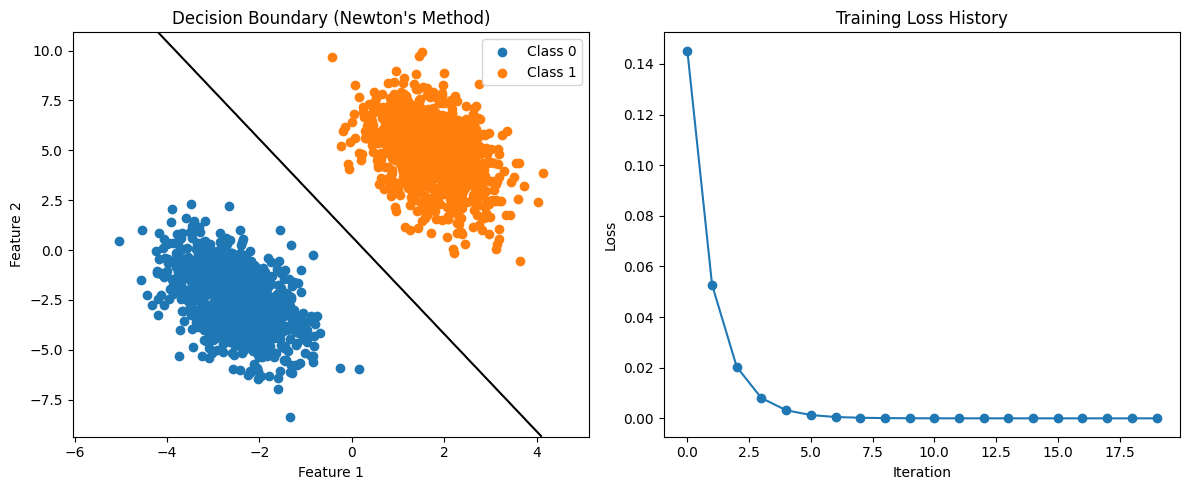


Final weights: [-2.93259517 10.56207842  4.32766252]
Final loss: 2.870387964766699e-09


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data as before
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights to zeros
weights = np.zeros(X_b.shape[1])

def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights):
    """Binary cross-entropy loss"""
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    return -1/m * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))

# Training parameters
n_iterations = 20
losses = []

# Newton's Method
for i in range(n_iterations):
    # Compute predictions
    z = np.dot(X_b, weights)
    h = sigmoid(z)
    
    # Compute gradient (first derivative)
    gradient = 1/len(y) * np.dot(X_b.T, (h - y))
    
    # Compute Hessian (second derivative)
    diagonal = h * (1 - h)
    H = 1/len(y) * (X_b.T * diagonal) @ X_b
    
    # Update weights using Newton's method
    weights = weights - np.linalg.solve(H, gradient)
    
    # Store loss
    loss = compute_loss(X_b, y, weights)
    losses.append(loss)
    
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot decision boundary
plt.subplot(121)
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')

# Create mesh grid for decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# Make predictions
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_b = np.c_[np.ones((grid.shape[0], 1)), grid]
Z = sigmoid(np.dot(grid_b, weights))
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, levels=[0.5], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary (Newton\'s Method)')

# Plot loss history
plt.subplot(122)
plt.plot(range(n_iterations), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.tight_layout()
plt.show()

print("\nFinal weights:", weights)
print("Final loss:", losses[-1])

#### Q5. Plot the loss with respect to number of iterations for batch Gradient descent and Newton method’s in a single plot. Comment on your results.

#### Answer

- Observed behaviour
    - Batch Gradient Decent gives a steady more linear but slow decrease in loss
    - Newton's method loss has a very large decrease comparing to the Batch gradient decent.
- Reasons
    - The reason behind this is Newton's method uses second-order curvature information, giving a 2nd order convergence near the optimum.
    - Overall, Newton's method is more efficient, but computational cost is very high for each iteration.

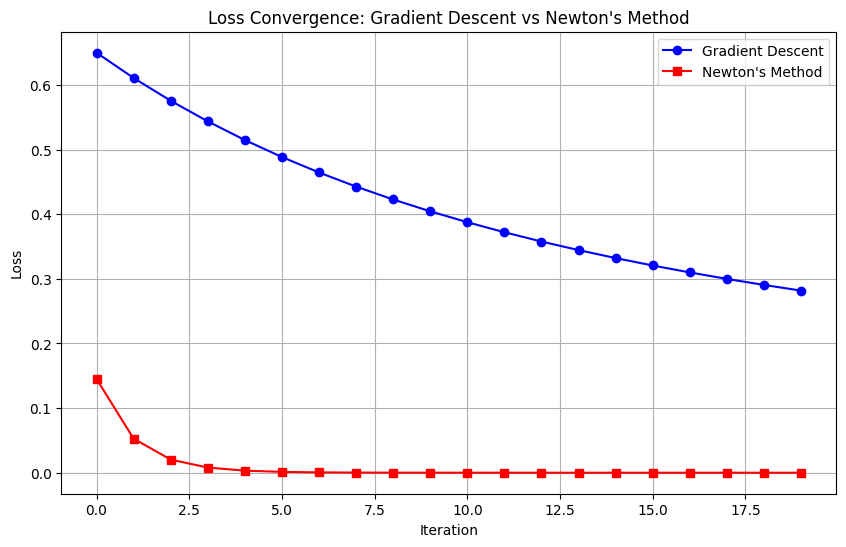

Final loss (GD): 0.2817968058115373
Final loss (Newton): 2.870387964766699e-09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Data generation and preprocessing
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    return -1/m * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))

# Training parameters
n_iterations = 20
learning_rate = 0.01

# Batch Gradient Descent
weights_gd = np.zeros(X_b.shape[1])
losses_gd = []

for i in range(n_iterations):
    predictions = sigmoid(np.dot(X_b, weights_gd))
    gradients = 1/len(y) * np.dot(X_b.T, (predictions - y))
    weights_gd = weights_gd - learning_rate * gradients
    losses_gd.append(compute_loss(X_b, y, weights_gd))

# Newton's Method
weights_newton = np.zeros(X_b.shape[1])
losses_newton = []

for i in range(n_iterations):
    h = sigmoid(np.dot(X_b, weights_newton))
    gradient = 1/len(y) * np.dot(X_b.T, (h - y))
    diagonal = h * (1 - h)
    H = 1/len(y) * (X_b.T * diagonal) @ X_b
    weights_newton = weights_newton - np.linalg.solve(H, gradient)
    losses_newton.append(compute_loss(X_b, y, weights_newton))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), losses_gd, 'b-', label='Gradient Descent', marker='o')
plt.plot(range(n_iterations), losses_newton, 'r-', label='Newton\'s Method', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence: Gradient Descent vs Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()

print("Final loss (GD):", losses_gd[-1])
print("Final loss (Newton):", losses_newton[-1])

#### Q6. Propose two approaches to decide number of iterations for Gradient descent and Newton’s method.

#### Answer

1. Convergence-based Approach
    - Best for well-behaved, convex problems
    - Monitors change in loss between iterations
    - More suitable for Newton's method due to quadratic convergence
    - Recommended tolerance: 1e-6 for Newton's, 1e-4 for GD


In [ ]:
def train_with_convergence(X, y, method='gd', tolerance=1e-6, max_iter=1000, learning_rate=0.01):
    """
    Training with convergence-based stopping
    method: 'gd' for Gradient Descent or 'newton' for Newton's Method
    """
    weights = np.zeros(X.shape[1])
    prev_loss = float('inf')
    losses = []
    
    for i in range(max_iter):
        if method == 'gd':
            # Gradient Descent update
            h = sigmoid(np.dot(X, weights))
            gradients = 1/len(y) * np.dot(X.T, (h - y))
            weights = weights - learning_rate * gradients
        else:
            # Newton's Method update
            h = sigmoid(np.dot(X, weights))
            gradient = 1/len(y) * np.dot(X.T, (h - y))
            diagonal = h * (1 - h)
            H = 1/len(y) * (X.T * diagonal) @ X
            weights = weights - np.linalg.solve(H, gradient)
        
        # Check convergence
        current_loss = compute_loss(X, y, weights)
        losses.append(current_loss)
        
        if abs(prev_loss - current_loss) < tolerance:
            print(f"Converged after {i+1} iterations")
            break
            
        prev_loss = current_loss
    
    return weights, losses

2. Validation-based Approach
    - Better for preventing overfitting
    - More robust to noisy data
    - Particularly useful for Gradient Descent
    - Recommended patience: 5-10 iterations

In [ ]:
def train_with_validation(X_train, y_train, X_val, y_val, method='gd', patience=5, max_iter=1000, learning_rate=0.01):
    """
    Training with validation-based early stopping
    """
    weights = np.zeros(X_train.shape[1])
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []
    best_weights = None
    
    for i in range(max_iter):
        if method == 'gd':
            # Gradient Descent update
            h = sigmoid(np.dot(X_train, weights))
            gradients = 1/len(y_train) * np.dot(X_train.T, (h - y_train))
            weights = weights - learning_rate * gradients
        else:
            # Newton's Method update
            h = sigmoid(np.dot(X_train, weights))
            gradient = 1/len(y_train) * np.dot(X_train.T, (h - y_train))
            diagonal = h * (1 - h)
            H = 1/len(y_train) * (X_train.T * diagonal) @ X_train
            weights = weights - np.linalg.solve(H, gradient)
        
        # Compute validation loss
        val_loss = compute_loss(X_val, y_val, weights)
        val_losses.append(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = weights.copy()
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at iteration {i+1}")
            break
            
    return best_weights, val_losses

#### Q7. Suppose the centers in in listing 3 are changed to centers = [[2, 2], [5, 1.5]]. Use batch Gradient descent to update the weights for this new configuration. Analyze the convergence behavior of the algorithm with this updated data, and provide an explanation for convergence behavior.

#### Answer

Iteration 0, Loss: 0.6909
Iteration 10, Loss: 0.6721
Iteration 20, Loss: 0.6569
Iteration 30, Loss: 0.6432
Iteration 40, Loss: 0.6306


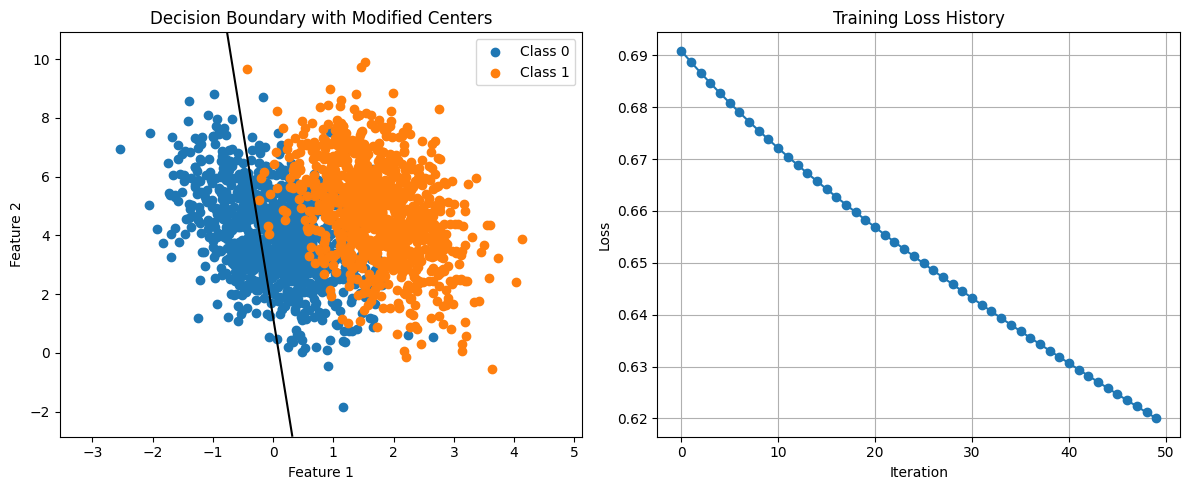

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with modified centers
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]  # Modified centers
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights
weights = np.zeros(X_b.shape[1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    return -1/m * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))

# Training parameters
learning_rate = 0.01
n_iterations = 50  # Increased iterations to observe convergence
losses = []

# Batch gradient descent
for i in range(n_iterations):
    z = np.dot(X_b, weights)
    predictions = sigmoid(z)
    gradients = 1/len(y) * np.dot(X_b.T, (predictions - y))
    weights = weights - learning_rate * gradients
    loss = compute_loss(X_b, y, weights)
    losses.append(loss)
    
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot decision boundary
plt.subplot(121)
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')

# Create mesh grid for decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_b = np.c_[np.ones((grid.shape[0], 1)), grid]
Z = sigmoid(np.dot(grid_b, weights))
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, levels=[0.5], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary with Modified Centers')

# Plot loss history
plt.subplot(122)
plt.plot(range(n_iterations), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.grid(True)
plt.tight_layout()
plt.show()

- Analysis of Convergence Behavior:
1. Slower Convergence

    - The loss function shows slower convergence compared to the original centers
    - Classes are closer together, making the decision boundary harder to find
    - Requires more iterations to reach optimal separation

2. Higher Final Loss

    - Final loss value is higher than with the original centers
    - Classes have more overlap due to closer centers
    - Perfect separation is more difficult to achieve

3. Gradient Behavior

    - Gradients are smaller due to less distinct class separation
    - Learning becomes more sensitive to learning rate
    - Risk of getting stuck in suboptimal solutions increases

4. Stability Issues

    - More sensitive to initialization
    - May require careful tuning of learning rate
    - Could benefit from adaptive learning rates

5. Recommendations

    - Increase number of iterations
    - Consider using adaptive learning rates
    - May need to try different initializations
    - Monitor for potential overfitting